In [4]:
#importing libraries
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
#Above is a special style template for matplotlib, highly useful for visualizing
#time series data
%matplotlib inline
from pylab import rcParams
from plotly import tools
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as gp
import plotly.figure_factory as ff
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import math
from sklearn.metrics import mean_squared_error
pd.options.display.float_format='{:.2f}'.format

参考：https://www.kaggle.com/code/thebrownviking20/everything-you-can-do-with-a-time-series

In [5]:
google = pd.read_csv('../input/GOOGL_2006-01-01_to_2018-01-01.csv', 
                     index_col='Date', parse_dates=['Date'])
google.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL


In [6]:
google.describe()

,Open,High,Low,Close,Volume
count,3019.00,3019.00,3019.00,3019.00,3019.00
mean,428.20,431.84,424.13,428.04,3551503.54
std,236.32,237.51,234.92,236.34,3038599.26
min,131.39,134.82,123.77,128.85,521141.00
25%,247.78,250.19,244.04,247.61,1760854.00
50%,310.48,312.81,307.79,310.08,2517630.00
75%,572.14,575.98,565.90,570.77,4242182.50
max,1083.02,1086.49,1072.27,1085.09,41182889.00


In [7]:
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3019 entries, 2006-01-03 to 2017-12-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3019 non-null   float64
 1   High    3019 non-null   float64
 2   Low     3019 non-null   float64
 3   Close   3019 non-null   float64
 4   Volume  3019 non-null   int64  
 5   Name    3019 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 165.1+ KB


## 1.3 Visualizing the datasets

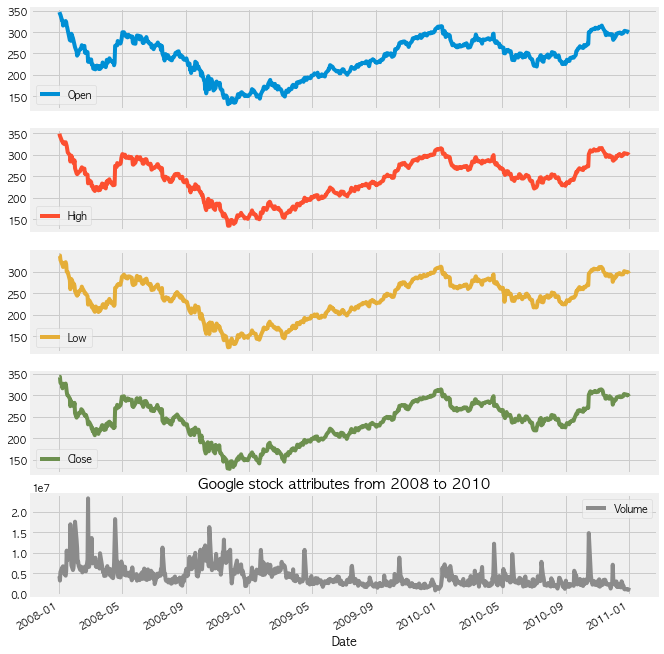

In [8]:
google['2008':'2010'].plot(subplots=True, figsize=(10,12))
plt.title('Google stock attributes from 2008 to 2010')
plt.savefig('stocks.png')
plt.show()

# 2 Finance and statistics

## 2.1 Percent change

<AxesSubplot:xlabel='Date'>

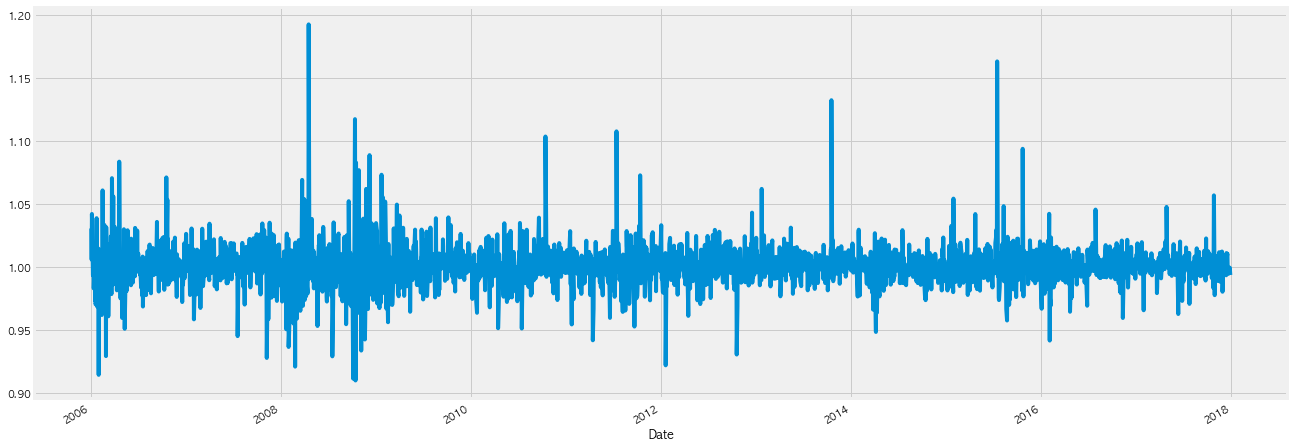

In [9]:
google['Change'] = google.High.div(google.High.shift())
google['Change'].plot(figsize=(20,8))

## 2.2 Stock returns

<AxesSubplot:xlabel='Date'>

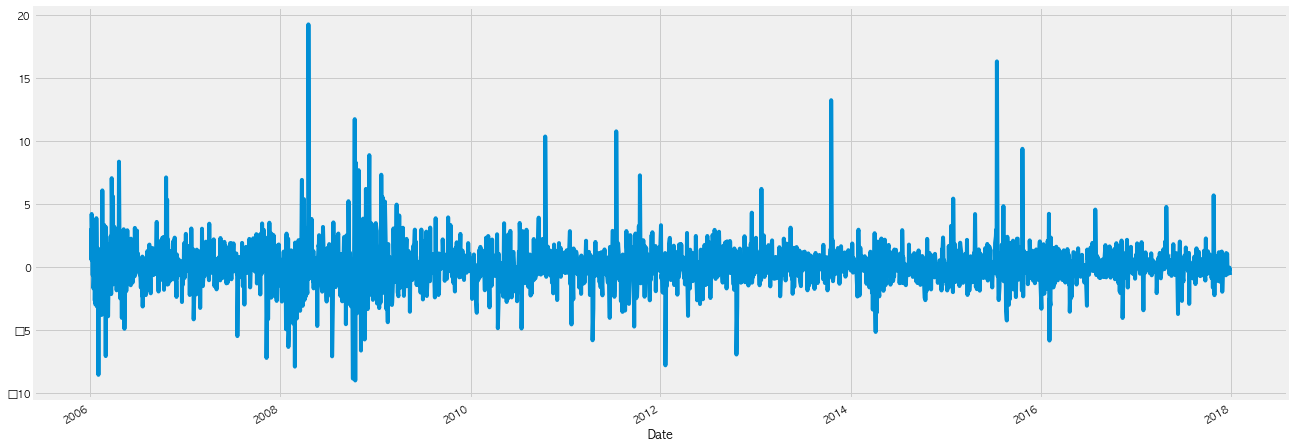

In [10]:
google['Return'] = google.Change.sub(1).mul(100)
google['Return'].plot(figsize=(20,8))

<AxesSubplot:xlabel='Date'>

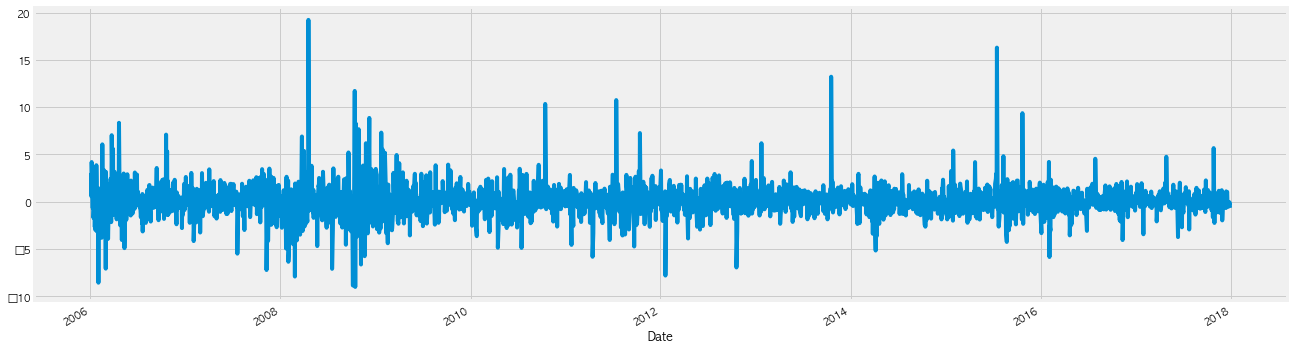

In [11]:
google.High.pct_change().mul(100).plot(figsize=(20,6))
#Another way to calculate returns

## 2.3 Absolute change in successive rows

<AxesSubplot:xlabel='Date'>

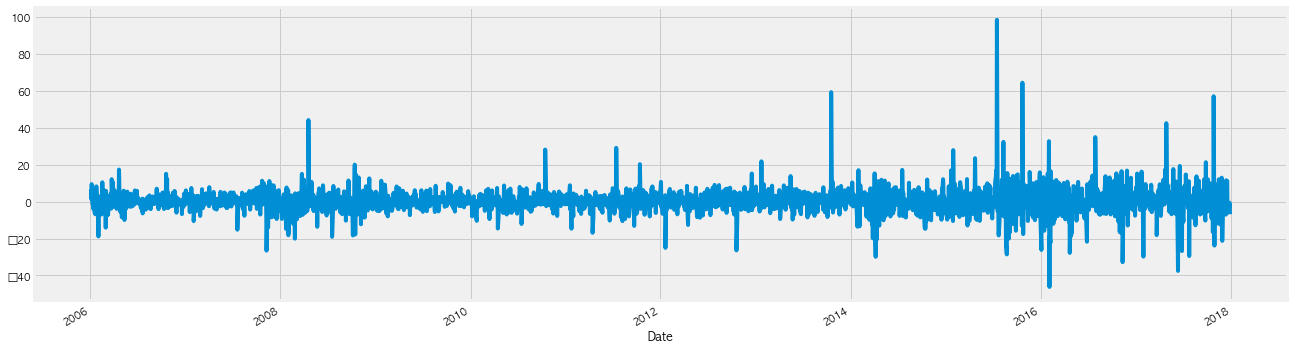

In [12]:
google.High.diff().plot(figsize=(20,6))

## 2.4 Comparing two or more time series

we will compare 2 time series by normalizing them. this is achieved by dividing each time series element of all time series by the first element. this way both series start at the same point and can be easily compared.

In [14]:
# we choose microsoft stocks to compare them with google
microsoft = pd.read_csv('../input/MSFT_2006-01-01_to_2018-01-01.csv',
                       index_col='Date', parse_dates=['Date'])

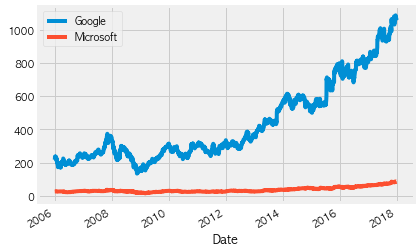

In [16]:
#plotting before normalization
google.High.plot()
microsoft.High.plot()
plt.legend(['Google','Microsoft'])
plt.show()

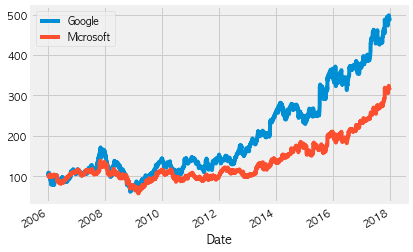

In [18]:
#Normalizing and comparison
#Both stocks start from 100
normalized_google = google.High.div(google.High.iloc[0]).mul(100)
normalized_microsoft = microsoft.High.div(microsoft.High.iloc[0]).mul(100)
normalized_google.plot()
normalized_microsoft.plot()
plt.legend(['Google','Microsoft'])
plt.show()

You can cleary see how google outperforms microsoft over time.

## 2.5 Window functions

Window functions are used to identify sub periods, calculates sub-metrics of sub-periods.

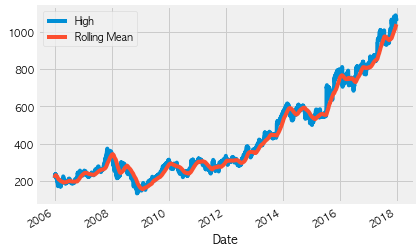

In [19]:
#Rolling window functions
rolling_google = google.High.rolling('90D').mean()
google.High.plot()
rolling_google.plot()
plt.legend(['High','Rolling Mean'])
#plotting a rolling mean of 90 day window with original High attribute of google
#stocks
plt.show()

Now observe that rolling mean plot is a smoother version of the original plot.

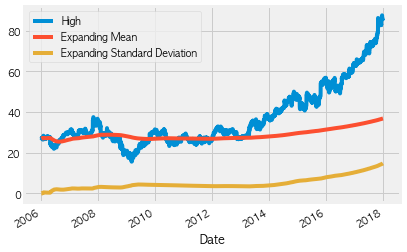

In [20]:
#expanding window functions
microsoft_mean = microsoft.High.expanding().mean()
microsoft_std = microsoft.High.expanding().std()
microsoft.High.plot()
microsoft_mean.plot()
microsoft_std.plot()
plt.legend(['High','Expanding Mean','Expanding Standard Deviation'])
plt.show()